In [1734]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns



from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

%matplotlib inline

In [1735]:
import matplotlib as PLT
PLT.rcParams.update({'figure.max_open_warning': 0})
PLT.rcParams.update({'font.size': 15})

PLT.rcParams['axes.linewidth'] = 2

PLT.rcParams['xtick.major.size'] = 3
PLT.rcParams['xtick.major.width'] = 2

PLT.rcParams['ytick.major.size'] = 3
PLT.rcParams['ytick.major.width'] = 2

In [38]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/DataTrans_1/'
path='/home/anna/PROJECTS2025/StatDatAnLAB/DataTrans/'

In [39]:
braindata=pd.read_csv(path+'proteins_SZL.csv',index_col=0)
brainsamples=pd.read_csv(path+'proteins_samples_SZL.csv',index_col=0)

In [40]:
blooddata=pd.read_csv(path+'blooddf.csv',index_col=0)
bloodsamples=pd.read_csv(path+'bloodsamples.csv',index_col=0)

## Predictive modelling

age vs bmi

Text(0, 0.5, 'bmi')

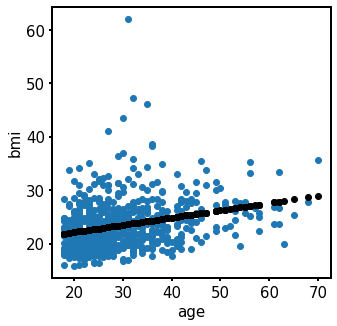

In [41]:
fig=plt.figure(figsize=(5,5))

x=bloodsamples['age']
y=bloodsamples['bmi']

lr=LinearRegression()
lr.fit(pd.DataFrame(x),y)
pred=lr.predict(pd.DataFrame(x))
#beta=lr.fit(pd.DataFrame(x),y).coef_
#interc=lr.fit(pd.DataFrame(x),y).intercept_

plt.scatter(x,y)
plt.scatter(x,pred,color='black')
plt.xlabel('age')
plt.ylabel('bmi')

In [42]:
pearsonr(x,y)[0], pearsonr(x,y)[0]**2

(0.2779942582122766, 0.0772808075989939)

## Coefficient of determination R2


RSS=residual sum of squares 

TSS=total sum of squares 

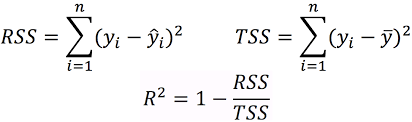

In [43]:
r2_score(y,pred)

0.07728080759899392

all lipids

Text(0, 0.5, 'prediction')

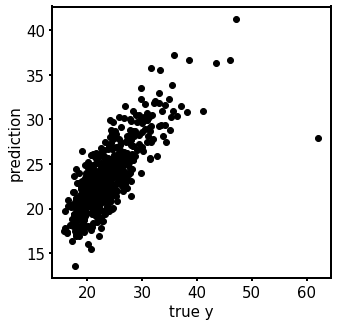

In [44]:
fig=plt.figure(figsize=(5,5))

X=np.log2(blooddata)
y=bloodsamples['bmi']

lr=LinearRegression()
lr.fit(X,y)
pred=lr.predict(X)


plt.scatter(y,pred,color='black')
plt.xlabel('true y')
plt.ylabel('prediction')

In [45]:
#pearsonr(y,pred)[0],pearsonr(y,pred)[0]**2

In [46]:
r2_score(y,pred)

0.624220084078962

what is wrong with this approach?

-CV

-subsmpling

In [47]:
X.shape

(604, 175)

Text(0, 0.5, 'prediction')

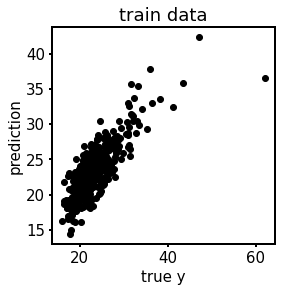

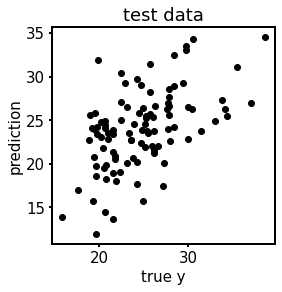

In [48]:
X=np.log2(blooddata)
y=bloodsamples['bmi']

train,test=train_test_split(X.index,test_size=100,train_size=400)

lr=LinearRegression()
lr.fit(X.loc[train],y[train])
predtrain=lr.predict(X.loc[train])
predtest=lr.predict(X.loc[test])

fig=plt.figure(figsize=(4,4))
plt.title('train data')
plt.scatter(y[train],predtrain,color='black')
plt.xlabel('true y')
plt.ylabel('prediction')


fig=plt.figure(figsize=(4,4))
plt.title('test data')
plt.scatter(y[test],predtest,color='black')
plt.xlabel('true y')
plt.ylabel('prediction')

In [49]:
r2_score(y[train],predtrain)

0.6693904173618601

In [50]:
r2_score(y[test],predtest)

0.01950943667961702

In [51]:
[i for i in train if i in test]

[]

In [52]:
kf=KFold(n_splits=5)
for train, test in kf.split(X):
    print(len(train),len(test))
    #print(test)

483 121
483 121
483 121
483 121
484 120


0.12546269834315937
0.14873137847946571
0.19615820914661375
0.4362810606881745
0.2194345020936701


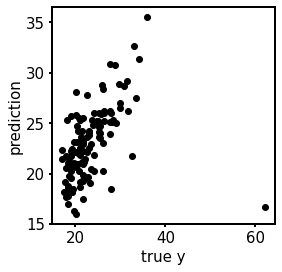

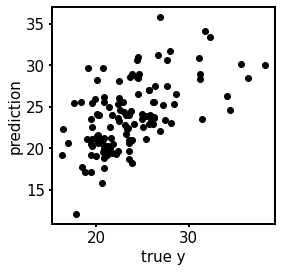

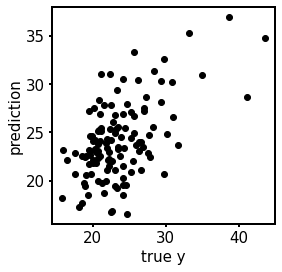

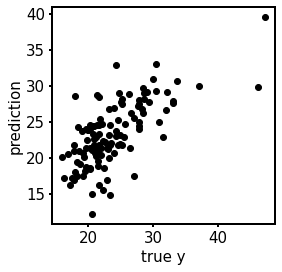

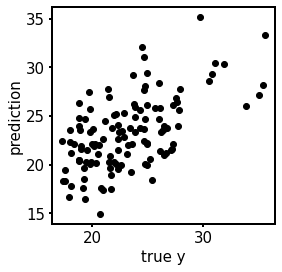

In [53]:
X=np.log2(blooddata)
y=bloodsamples['bmi']
IND=X.index
kf=KFold(n_splits=5,shuffle=True)

for train, test in kf.split(X):
    
    lr=LinearRegression()
    lr.fit(X.loc[IND[train]],y[IND[train]])
    predtrain=lr.predict(X.loc[IND[train]])
    predtest=lr.predict(X.loc[IND[test]])
    
    fig=plt.figure(figsize=(4,4))
    plt.scatter(y[IND[test]],predtest,color='black')
    plt.xlabel('true y')
    plt.ylabel('prediction')
    print(r2_score(y[IND[test]],predtest))

## what about binary target variable?

In [54]:
bloodsamples.loc[bloodsamples['sex']=='f','sex binary']=1
bloodsamples.loc[bloodsamples['sex']=='m','sex binary']=0

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


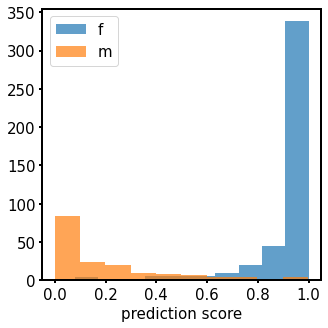

In [55]:
fig=plt.figure(figsize=(5,5))

X=np.log2(blooddata)
y=bloodsamples['sex binary']

lr=LogisticRegression()
lr.fit(X,y)
pred=lr.predict_proba(X)[:,1]


plt.hist(pred[y==1],alpha=0.7,label='f')
plt.hist(pred[y==0],alpha=0.7,label='m')
plt.xlabel('prediction score')
plt.legend()

what is wrong with this approach?

/home/anna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


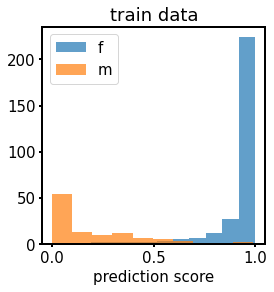

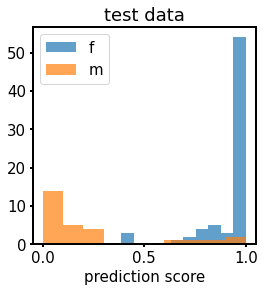

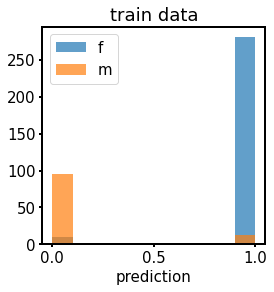

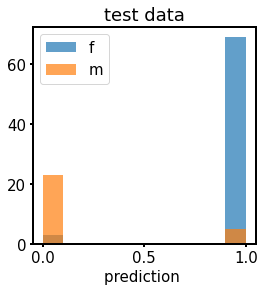

In [60]:
X=np.log2(blooddata)
y=bloodsamples['sex binary']

train,test=train_test_split(X.index,test_size=100,train_size=400)


lr=LogisticRegression()
lr.fit(X.loc[train],y[train])

predtrain=lr.predict_proba(X.loc[train])[:,1]
predtest=lr.predict_proba(X.loc[test])[:,1]

fig=plt.figure(figsize=(4,4))
plt.title('train data')
plt.hist(predtrain[y[train]==1],alpha=0.7,label='f')
plt.hist(predtrain[y[train]==0],alpha=0.7,label='m')
plt.xlabel('prediction score')
plt.legend()


fig=plt.figure(figsize=(4,4))
plt.title('test data')
plt.hist(predtest[y[test]==1],alpha=0.7,label='f')
plt.hist(predtest[y[test]==0],alpha=0.7,label='m')
plt.xlabel('prediction score')
plt.legend()




predtrain=lr.predict(X.loc[train])
predtest=lr.predict(X.loc[test])


fig=plt.figure(figsize=(4,4))
plt.title('train data')
plt.hist(predtrain[y[train]==1],alpha=0.7,label='f')
plt.hist(predtrain[y[train]==0],alpha=0.7,label='m')
plt.xlabel('prediction')
plt.legend()


fig=plt.figure(figsize=(4,4))
plt.title('test data')
plt.hist(predtest[y[test]==1],alpha=0.7,label='f')
plt.hist(predtest[y[test]==0],alpha=0.7,label='m')
plt.xlabel('prediction ')
plt.legend()


 metrics

-accuracy

-sensitivity (proportion of 1 cases predicted as 1, TPR)

-specificity (proportion 0 cases predicted as 0, TNR )

-Area under the ROC Curve (TPR vs the FPR = 1-TNR)


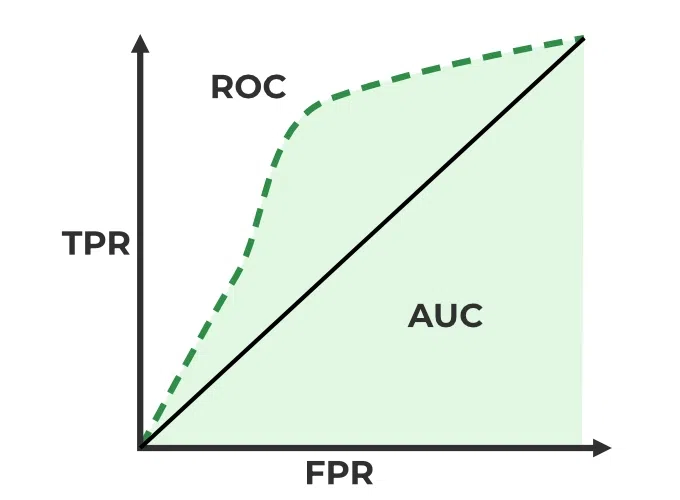

In [57]:
#next topics:
#correlate features in linear models, regularization
#small sample sizes, varibaility in predictions, basic rule of feature selection

## train vs test data

train vs test data score, model complexity

complex model can always perfectly fit on train data

In [240]:
K=500

Nfeats=50
#Nfeats=250

X=pd.DataFrame(normal(0,1,(2*K,Nfeats)))
y=np.array([0]*K+[1]*K)

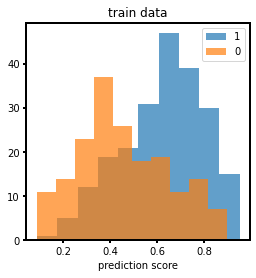

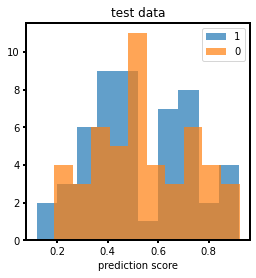

In [241]:
train,test=train_test_split(X.index,test_size=100,train_size=400)


lr=LogisticRegression()
lr.fit(X.loc[train],y[train])

predtrain=lr.predict_proba(X.loc[train])[:,1]
predtest=lr.predict_proba(X.loc[test])[:,1]

fig=plt.figure(figsize=(4,4))
plt.title('train data')
plt.hist(predtrain[y[train]==1],alpha=0.7,label='1')
plt.hist(predtrain[y[train]==0],alpha=0.7,label='0')
plt.xlabel('prediction score')
plt.legend()


fig=plt.figure(figsize=(4,4))
plt.title('test data')
plt.hist(predtest[y[test]==1],alpha=0.7,label='1')
plt.hist(predtest[y[test]==0],alpha=0.7,label='0')
plt.xlabel('prediction score')
plt.legend()


roc_auc_score(y[train],predtrain)

In [242]:
roc_auc_score(y[test],predtest)

0.47458983593437376

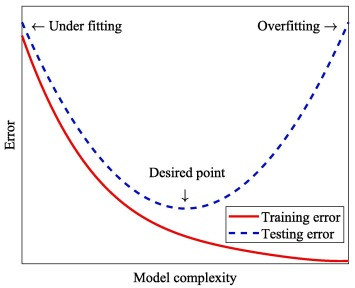

## linear model, regularization

show formula ; ex. more features than samples

logistic regression

0.19517701124800502
0.30588773542774994
0.24784114144429847
0.17800699774533257
0.25546058493678825


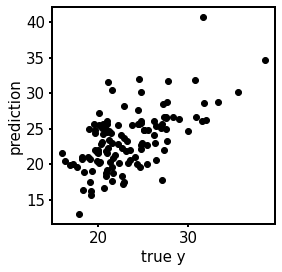

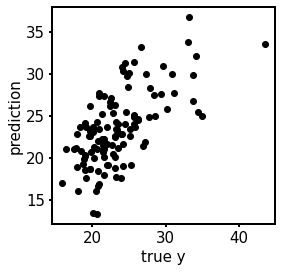

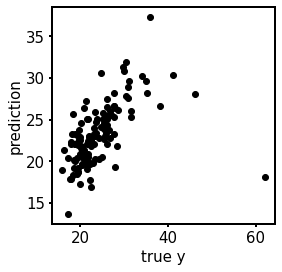

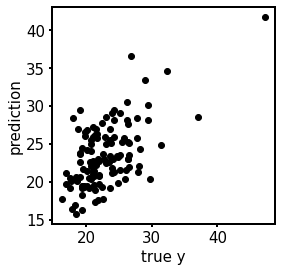

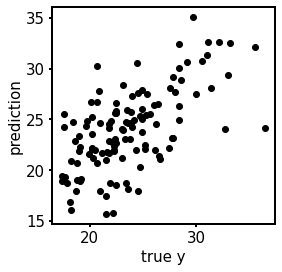

In [2200]:
R2=[]

X=np.log2(blooddata)
y=bloodsamples['bmi']
IND=X.index
kf=KFold(n_splits=5,shuffle=True)

for train, test in kf.split(X):
    
    lr=LinearRegression()
    lr.fit(X.loc[IND[train]],y[IND[train]])
    predtrain=lr.predict(X.loc[IND[train]])
    predtest=lr.predict(X.loc[IND[test]])
    
    fig=plt.figure(figsize=(4,4))
    plt.scatter(y[IND[test]],predtest,color='black')
    plt.xlabel('true y')
    plt.ylabel('prediction')
    r2=r2_score(y[IND[test]],predtest)
    print(r2)
    R2.append(r2)

In [2201]:
np.mean(R2)

0.23647469416043485

In [2202]:
R2

[0.19517701124800502,
 0.30588773542774994,
 0.24784114144429847,
 0.17800699774533257,
 0.25546058493678825]

btw, negative R2?

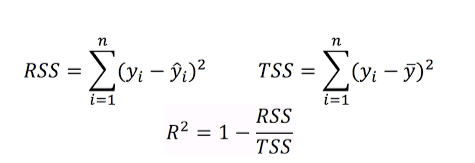

PCA+logistic regression 

In [2204]:
R2=[]
ncomponents=80

tmp=np.log2(blooddata)
model=PCA(n_components=ncomponents).fit(tmp)
X=pd.DataFrame(model.transform(tmp),index=X.index,columns=np.arange(0,ncomponents))


y=bloodsamples['bmi']
IND=X.index
kf=KFold(n_splits=5,shuffle=True)

for train, test in kf.split(X):
    
    lr=LinearRegression()
    lr.fit(X.loc[IND[train]],y[IND[train]])
    predtrain=lr.predict(X.loc[IND[train]])
    predtest=lr.predict(X.loc[IND[test]])

    r2=r2_score(y[IND[test]],predtest)
    print(r2)
    R2.append(r2)

0.07037783878934001
0.33007230482228134
0.3881499205137938
0.4129906570720443
0.3440543133767977


In [2205]:
np.mean(R2)

0.30912900691485146

logistic regression + regularization

In [2206]:
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso

ridge

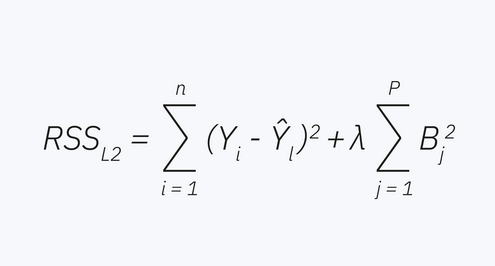

In [2207]:
R2=[]

X=np.log2(blooddata)
#X=(X-X.mean())/X.std()

y=bloodsamples['bmi']
IND=X.index

kf=KFold(n_splits=5,shuffle=True)

for train, test in kf.split(X):
    
    lr=Ridge(alpha=10,max_iter=10000)
    lr.fit(X.loc[IND[train]],y[IND[train]])
    predtrain=lr.predict(X.loc[IND[train]])
    predtest=lr.predict(X.loc[IND[test]])

    r2=r2_score(y[IND[test]],predtest)
    print(r2)
    R2.append(r2)

0.3250427761091186
0.4451898842898614
0.17538322167732023
0.42714017668271853
0.44612774267995703


In [2208]:
np.mean(R2)

0.36377676028779515

In [2209]:
lr.coef_==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

lasso

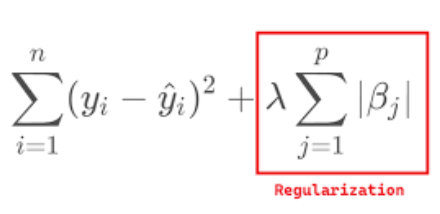

In [2210]:
R2=[]

X=np.log2(blooddata)
#X=(X-X.mean())/X.std()

y=bloodsamples['bmi']
IND=X.index

kf=KFold(n_splits=5,shuffle=True)

for train, test in kf.split(X):
    
    lr=Lasso(alpha=0.01,max_iter=10000)
    lr.fit(X.loc[IND[train]],y[IND[train]])
    predtrain=lr.predict(X.loc[IND[train]])
    predtest=lr.predict(X.loc[IND[test]])

    r2=r2_score(y[IND[test]],predtest)
    print(r2)
    R2.append(r2)

0.38671576136643937
0.5302651128064765
0.4208581863842876
0.18090690165786005
0.32741066794837625


In [2211]:
np.mean(R2)

0.36923132603268793

In [2212]:
lr.coef_==0

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True, False,  True, False, False,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False,

ridge

Text(0, 0.5, 'mean R2 score')

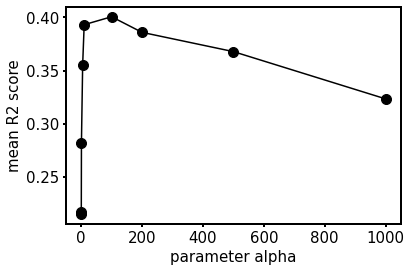

In [2222]:
grid=[0.1,0.5,1,5,10,100,200,500,1000]


X=np.log2(blooddata)
X=(X-X.mean())/X.std()
y=bloodsamples['bmi']
IND=X.index

#tmp=np.log2(blooddata)
#ncomponents=len(tmp.columns)
#model=PCA(n_components=ncomponents).fit(tmp)
#X=pd.DataFrame(model.transform(tmp),index=X.index,columns=np.arange(0,ncomponents))
#X=(X-X.mean())/X.std()
#y=bloodsamples['bmi']
#IND=X.index

meanR2=pd.Series(dtype=float,index=grid)
for A in grid:

    R2=[]
    kf=KFold(n_splits=5,shuffle=True)

    for train, test in kf.split(X):
        lr=Ridge(alpha=A,max_iter=1000)
        lr.fit(X.loc[IND[train]],y[IND[train]])
        predtrain=lr.predict(X.loc[IND[train]])
        predtest=lr.predict(X.loc[IND[test]])

        r2=r2_score(y[IND[test]],predtest)
        R2.append(r2)
        
    meanR2[A]=np.mean(R2)
    
    
plt.scatter(grid,meanR2,color='black',s=100)    
plt.plot(grid,meanR2,color='black')    
plt.xlabel('parameter alpha')
plt.ylabel('mean R2 score')

In [460]:
meanR2.sort_values()

0.1       0.200552
0.5       0.238654
10.0      0.300999
1.0       0.310155
1000.0    0.319302
5.0       0.333710
500.0     0.353452
100.0     0.388389
200.0     0.403798
dtype: float64

lasso

Text(0, 0.5, 'mean R2 score')

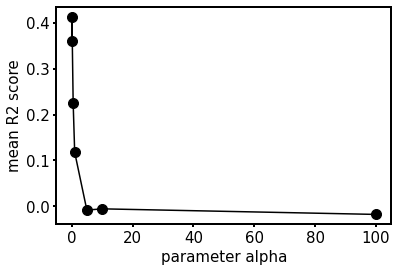

In [2217]:
grid=[0.01,0.1,0.5,1,5,10,100]

X=np.log2(blooddata)
X=(X-X.mean())/X.std()
y=bloodsamples['bmi']
IND=X.index


meanR2=pd.Series(dtype=float,index=grid)
for A in grid:

    R2=[]
    kf=KFold(n_splits=5,shuffle=True)

    for train, test in kf.split(X):
        lr=Lasso(alpha=A,max_iter=10000)
        lr.fit(X.loc[IND[train]],y[IND[train]])
        predtrain=lr.predict(X.loc[IND[train]])
        predtest=lr.predict(X.loc[IND[test]])

        r2=r2_score(y[IND[test]],predtest)
        R2.append(r2)
        
    meanR2[A]=np.mean(R2)
    
    

plt.scatter(grid,meanR2,color='black',s=100)    
plt.plot(grid,meanR2,color='black')     
#plt.scatter(1/np.array(grid),meanR2,color='black',s=100)    
#plt.plot(1/np.array(grid),meanR2,color='black')    
plt.xlabel('parameter alpha')
plt.ylabel('mean R2 score')

In [409]:
lr.coef_

array([ 0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0.,
       -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,
        0., -0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0.,  0.,  0., -0.,  0.,  0., -0., -0.,  0.,
        0.,  0., -0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0., -0.,
        0., -0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,
       -0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,
        0., -0., -0., -0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

## train, validation, test

## instability of CV estimates

In [870]:
subsample=blooddata.index

X=np.log2(blooddata).loc[subsample]
X=(X-X.mean())/X.std()

y=bloodsamples['sex binary'].loc[subsample]


IND=X.index

In [871]:
meanAUC=pd.Series(dtype=float,index=np.arange(0,100))
for i in np.arange(0,100):
    AUC=[]
    kf=KFold(n_splits=5,shuffle=True)
    for train, test in kf.split(X):
        lr=LogisticRegression(penalty='l1', C=0.5,max_iter=1000,solver='liblinear')
        lr.fit(X.loc[IND[train]],y[IND[train]])
        
        predtrain=lr.predict_proba(X.loc[IND[train]])[:,1]
        predtest=lr.predict_proba(X.loc[IND[test]])[:,1]

        auc=roc_auc_score(y[IND[test]],predtest)
        AUC.append(auc)
        
    meanAUC[i]=np.mean(AUC)


Text(0.5, 0, 'estimate of model in CV, different random states')

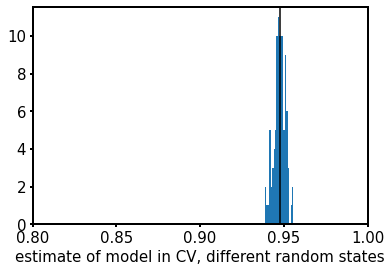

In [872]:
plt.hist(meanAUC,bins=20);
plt.axvline(np.mean(meanAUC),color='black')
plt.xlim([0.8,1])
plt.xlabel('estimate of model in CV, different random states')

In [873]:
subsample=choice(blooddata.index,200,replace=False)

X=np.log2(blooddata).loc[subsample]
X=(X-X.mean())/X.std()

y=bloodsamples['sex binary'].loc[subsample]


IND=X.index

In [874]:
meanAUC=pd.Series(dtype=float,index=np.arange(0,100))
for i in np.arange(0,100):
    AUC=[]
    kf=KFold(n_splits=5,shuffle=True)
    for train, test in kf.split(X):
        lr=LogisticRegression(penalty='l1', C=0.5,max_iter=1000,solver='liblinear')
        lr.fit(X.loc[IND[train]],y[IND[train]])
        
        predtrain=lr.predict_proba(X.loc[IND[train]])[:,1]
        predtest=lr.predict_proba(X.loc[IND[test]])[:,1]

        auc=roc_auc_score(y[IND[test]],predtest)
        AUC.append(auc)
        
    meanAUC[i]=np.mean(AUC)

Text(0.5, 0, 'estimate of model in CV, different random states')

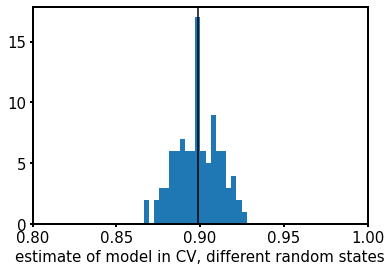

In [875]:
plt.hist(meanAUC,bins=20);
plt.axvline(np.mean(meanAUC),color='black')
plt.xlim([0.8,1])
plt.xlabel('estimate of model in CV, different random states')

In [913]:
subsample=choice(blooddata.index,100,replace=False)

X=np.log2(blooddata).loc[subsample]
X=(X-X.mean())/X.std()

y=bloodsamples['sex binary'].loc[subsample]


IND=X.index

In [923]:
meanAUC=pd.Series(dtype=float,index=np.arange(0,100))
for i in np.arange(0,100):
    AUC=[]
    kf=KFold(n_splits=5,shuffle=True)
    for train, test in kf.split(X):
        lr=LogisticRegression(penalty='l1', C=0.5,max_iter=1000,solver='liblinear')
        lr.fit(X.loc[IND[train]],y[IND[train]])
        
        predtrain=lr.predict_proba(X.loc[IND[train]])[:,1]
        predtest=lr.predict_proba(X.loc[IND[test]])[:,1]

        auc=roc_auc_score(y[IND[test]],predtest)
        AUC.append(auc)
        
    meanAUC[i]=np.mean(AUC)

Text(0.5, 0, 'estimate of model in CV, different random states')

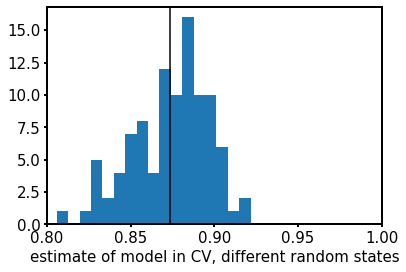

In [924]:
plt.hist(meanAUC,bins=20);
plt.axvline(np.mean(meanAUC),color='black')
plt.xlim([0.8,1])
plt.xlabel('estimate of model in CV, different random states')

In [925]:
np.mean(meanAUC)

0.8732958949985342

In [909]:
## example

In [914]:
AUC=[]
kf=KFold(n_splits=5,shuffle=True)
for train, test in kf.split(X):
    lr=LogisticRegression(penalty='l1', C=0.5,max_iter=1000,solver='liblinear')
    lr.fit(X.loc[IND[train]],y[IND[train]])
        
    predtrain=lr.predict_proba(X.loc[IND[train]])[:,1]
    predtest=lr.predict_proba(X.loc[IND[test]])[:,1]

    auc=roc_auc_score(y[IND[test]],predtest)
    AUC.append(auc)
        
np.mean(AUC)

0.8807417582417582

alternative: calculate mean of 100 train test splits

In [928]:
AUC=[]

for i in np.arange(0,100):
    train,test=train_test_split(X.index,test_size=20,train_size=80)
    lr=LogisticRegression(penalty='l1', C=0.5,max_iter=1000,solver='liblinear')
    lr.fit(X.loc[train],y[train])
        
    predtrain=lr.predict_proba(X.loc[train])[:,1]
    predtest=lr.predict_proba(X.loc[test])[:,1]

    auc=roc_auc_score(y[test],predtest)
    AUC.append(auc)

In [934]:
np.mean(AUC)

0.7909228657178735

## feature selection: most important rule

In [1497]:
subsample=choice(blooddata.index,60,replace=False)

X=np.log2(blooddata).loc[subsample]
y=bloodsamples['sex binary'].loc[subsample]


IND=X.index

In [1498]:
bloodsamples.loc[subsample].groupby('sex binary').count()

,age,sex,bmi
sex binary,,,
0.0,14,14,14
1.0,46,46,46


In [1536]:
Xnorm=(X-X.mean())/X.std()

In [1537]:
AUC=[]

for i in np.arange(0,100):
    train,test=train_test_split(Xnorm.index,test_size=20,train_size=40)
    lr=LogisticRegression(penalty='l1', C=0.5,max_iter=1000,solver='liblinear')
    lr.fit(Xnorm.loc[train],y[train])
        
    predtest=lr.predict_proba(Xnorm.loc[test])[:,1]

    auc=roc_auc_score(y[test],predtest)
    AUC.append(auc)

In [1539]:
np.mean(AUC)

0.8467588456800338

In [1540]:
ind1=y[y==1].index
ind0=y[y==0].index

In [1541]:
pv=pd.Series(ttest_ind(X.loc[ind1],X.loc[ind0])[1],index=blooddata.columns)

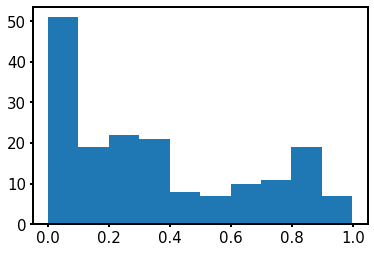

In [1542]:
plt.hist(pv);

In [1543]:
bestfeats=pv.sort_values()[:20].index

In [1544]:
AUC=[]

for i in np.arange(0,100):
    train,test=train_test_split(Xnorm.index,test_size=20,train_size=40)
    lr=LogisticRegression(max_iter=1000,solver='liblinear')
    lr.fit(Xnorm.loc[train,bestfeats],y[train])
        

    predtest=lr.predict_proba(Xnorm.loc[test,bestfeats])[:,1]

    auc=roc_auc_score(y[test],predtest)
    AUC.append(auc)

In [1545]:
np.mean(AUC)

0.8974096957372693

## what is wrong with this approach?

In [1507]:
Xnoise=pd.DataFrame(normal(10,1,(len(X.index),1000)),index=X.index)

In [1508]:
Xnoise.shape

(60, 1000)

In [1509]:
Xnorm=(Xnoise-Xnoise.mean())/Xnoise.std()

In [1515]:
AUC=[]

for i in np.arange(0,100):
    train,test=train_test_split(Xnorm.index,test_size=20,train_size=40)
    lr=LogisticRegression(penalty='l1', C=1,max_iter=1000,solver='liblinear')
    lr.fit(Xnorm.loc[train],y[train])
        
    predtest=lr.predict_proba(Xnorm.loc[test])[:,1]

    auc=roc_auc_score(y[test],predtest)
    AUC.append(auc)

In [1516]:
np.mean(AUC)

0.5302925309167956

In [1517]:
pv=pd.Series(ttest_ind(Xnoise.loc[ind1],Xnoise.loc[ind0])[1],index=Xnoise.columns)

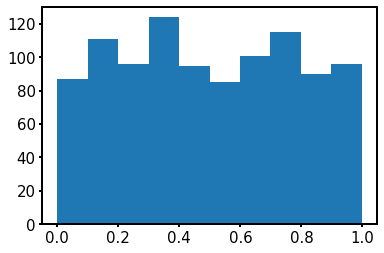

In [1518]:
plt.hist(pv);

In [1519]:
bestfeats=pv.sort_values()[:20].index

In [1520]:
AUC=[]

for i in np.arange(0,100):
    train,test=train_test_split(Xnorm.index,test_size=20,train_size=40)
    lr=LogisticRegression( max_iter=1000,solver='liblinear')
    lr.fit(Xnorm.loc[train,bestfeats],y[train])
        
    predtest=lr.predict_proba(Xnorm.loc[test,bestfeats])[:,1]

    auc=roc_auc_score(y[test],predtest)
    AUC.append(auc)

In [1521]:
np.mean(AUC)

0.9947211129964806